# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [9]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import random
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

The first part of this problem is to create a function that can solve the model, ie. give the optimal labor supply and consumption given the parameters.
We can first define the parameters given. Then we will create a function that takes these parameters as inputs, as well as an initial guess.
The output is then the utility multiplied by -1 (since we are using a minimizer function).

We can now create the function that minimizes the output from the previous function, using the optimize-minimize function.

An important thing to note is, that because the utility is monotonically increasing in the consumption, then $c^*=x$. This means that it is enough to just find the optimal labor supply, and then insert this in the equation for x to find the optimal consumption. 

In [10]:
#Defining the parameters
w=1
m=1
nu=10
epsilon = 0.3
tau0=0.4
tau1=0.1
kappa=0.4

#Creating function that calculates the utility (multiplied by -1)
def function(guess,w,m,nu,epsilon,tau0,tau1, kappa):
    l=guess

    c = m+w*l-tau0*w*l-tau1*np.fmax(w*l-kappa,0)  #c was just equal to x
    
    utility = np.log(c)-nu*l**(1+1/epsilon)/(1+1/epsilon) #defining the utility function
    return -utility #returning the utility multiplied by -1 so we can minimize


#Creating function that calculates optimal labor supply and consumption
def opt_values(guess,w=w,m=m,nu=nu,epsilon=epsilon,tau0=tau0,tau1=tau1, kappa=kappa):
    solution = optimize.minimize(function,guess,args = (w,m,nu,epsilon,tau0,tau1,kappa),bounds=(0,1),method='Nelder-Mead') 
    l_opt=solution.x
    c_opt = m+w*l_opt-tau0*w*l_opt-tau1*np.fmax(w*l_opt-kappa,0) #the optimal c was just a function of l_opt
    
    return l_opt,c_opt #returning the optimal labor supply and optimal consumption

    

# Question 2

Next we would like to plot the optimal labor supply and optimal consumption as a function of the wage. 

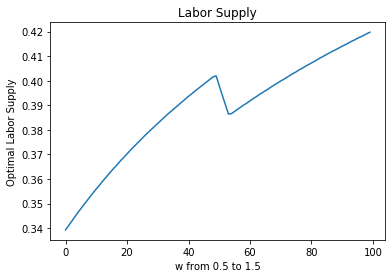

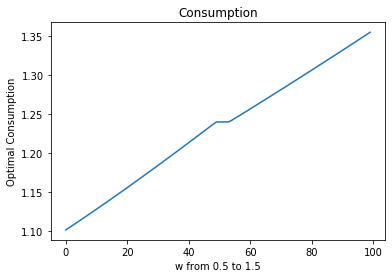

In [11]:
x=np.linspace(0.5,1.5,100) #creating vector with values from 0.5 to 1.5 
x_vec=np.zeros((100,2)) #creating empty matrix 

#looping through different values of the wage to get the optimal l and c
for i in range(0,100):
    x_vec[i] = opt_values(guess = 0.5,w = x[i]) #filling in the numbers in the matrix


#Plotting wage against labor supply
plt.plot(x_vec[:,0])
plt.xlabel("w from 0.5 to 1.5")
plt.ylabel("Optimal Labor Supply")
plt.title("Labor Supply")
plt.show()

#Plotting wage against consumption
plt.plot(x_vec[:,1])
plt.xlabel("w from 0.5 to 1.5")
plt.ylabel("Optimal Consumption")
plt.title("Consumption")
plt.show()


NIKOLAJ sig noget klogt om de to plots

# Question 3

After creating the function to solve the problem, we will now simulate the model to get some results.
Assumes that we have a population of 10.000 people.
The wage for each individual is uniformly distributed between 0.5 and 1.5.
The goal now is to calculate the total tax revenue, which is given by
$$T=\sum_{1=1}^{10000}\tau_0w_i*l_i^*+\tau_1*max(w_i*l_i^*-\kappa,0)$$

In [15]:

random.seed(111)
W = np.random.uniform(size=10000,low=0.5,high=1.5) #simulating wages for all individuals

matrix = np.zeros((10000,2)) #creating matrix of zero-values

#looping through all wages of each individual to find the optimal labor supply and consumption for each individual
for i in range(0,10000):
    matrix[i-1]=opt_values(guess=0.5,w=W[i]) #filling in the values in the matrix
    
c_opt = matrix[:,1]
l_opt = matrix[:,0]


Total_tax_revenue=np.sum(tau0*W*l_opt+tau1*np.fmax(W*l_opt-kappa,0)) #implementing the formula for the total tax revenue

print(Total_tax_revenue) #The result

1603.4723117338285


# Question 4

So, in our simulation, the total tax revenue was estimated to around 1600. What would happen, if we in stead changed the Frisch elasticity from 0.3 to 0.1? 

In [55]:
# code
matrix = np.zeros((10000,2))

for i in range(0,10000):
    matrix[i]=opt_values(guess=0.5,w=W[i],epsilon=0.1)
    
c_opt = matrix[:,1]
l_opt = matrix[:,0]


Total_tax_revenue=np.sum(tau0*W*l_opt+tau1*np.fmax(W*l_opt-kappa,0))

print(Total_tax_revenue)

3225.3115511682445


NIKOLAJ sig noget klogt frisch og resultatet

# Question 5

Lastly, we are now interested in finding the choice og tax levels and cut off for the upper tax bracket such that the total tax revenue is maximized.

In other words, we want to find a $\tau_0,\tau_1,\kappa$ such that $T$ is maximized. 

In [17]:
# code
random.seed(111)
W = np.random.uniform(size=10,low=0.5,high=1.5)


def tax_calculater(guesses):
    tau0 = guesses[0]
    tau1 = guesses[1]
    kappa = guesses[2]
    
    if tau0 <0 or tau1 <0 or kappa <0 or tau0+tau1>1:
        tax = -np.inf
    else:
        matrix = np.zeros((10,2))
        for i in range(0,10):
            matrix[i]=opt_values(guess=0.5,w=W[i],tau0=tau0,kappa=kappa,tau1=tau1)
        l_opt= matrix[:,0]
        tax = np.sum(tau0*W*l_opt+tau1*np.fmax(W*l_opt-kappa,0))
    return -tax



solution = optimize.minimize(tax_calculater,np.array([0.4,0.4,0.4]),method='Nelder-Mead')
print(solution.x)

[0.78697265 0.01161008 0.50238212]


# Conclusion

NIKOLAJ sig noget klogt om vores resultater